# Report 1

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.linalg import svd

### Data and EDA

In [129]:
pathname = 'Data/SAheart.data.txt'
data = pd.read_csv(pathname, sep=",", header=0, index_col='row.names')

data

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
row.names,,,,,,,,,,
1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
...,...,...,...,...,...,...,...,...,...,...
459,214,0.40,5.98,31.72,Absent,64,28.45,0.00,58,0
460,182,4.20,4.41,32.10,Absent,52,28.61,18.72,52,1
461,108,3.00,1.59,15.23,Absent,40,20.09,26.64,55,0


In [130]:
# Give an account of whether there are data issues (i.e., missing values or corrupted data) and describe them if so.

missing_data = data.isnull().sum()
missing_data[missing_data > 0]

Series([], dtype: int64)

In [131]:
# Include basic summary statistics of the attributes.

print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')
data.describe()

The dataset has 462 rows and 10 columns.


,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


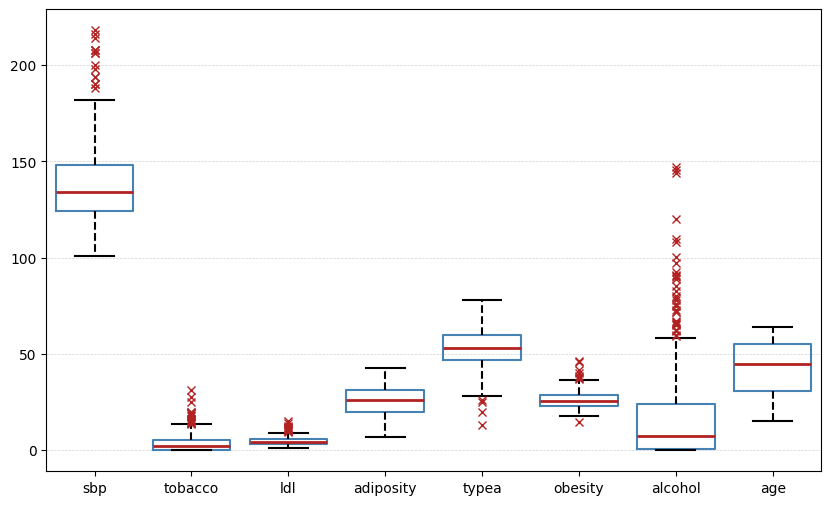

In [132]:
# Are there issues with outliers in the data?
numeric_columns = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']

plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(data=data[numeric_columns], 
                      color='steelblue', 
                      showcaps=True, 
                      fill=False,
                      flierprops=dict(marker='x', color='firebrick', markersize=6, markeredgecolor='firebrick'),
                      medianprops=dict(color='firebrick', linewidth=2),
                      whiskerprops=dict(color='black', linewidth=1.5, linestyle='dashed'),
                      capprops=dict(color='black', linewidth=1.5))

plt.grid(True, which='both', axis='y', color='lightgray', linestyle='--', linewidth=0.5)
plt.xticks()
plt.show()

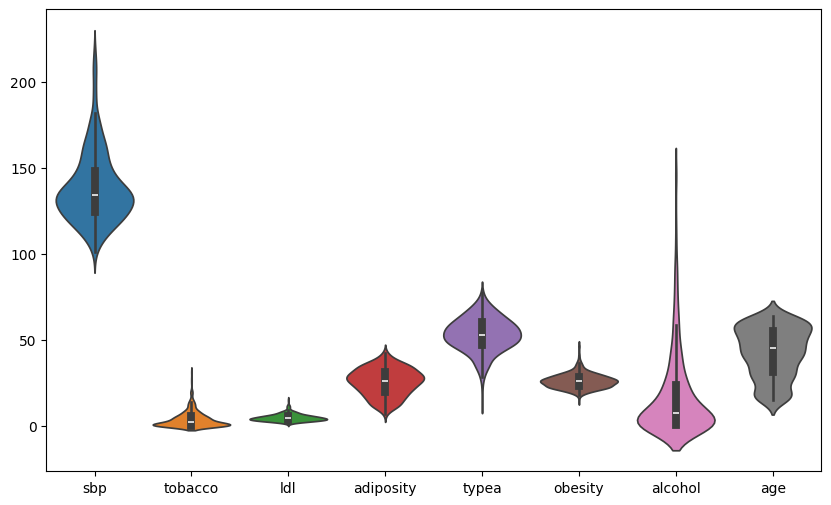

In [133]:
plt.figure(figsize=(10, 6))
boxplot = sns.violinplot(data=data[numeric_columns])

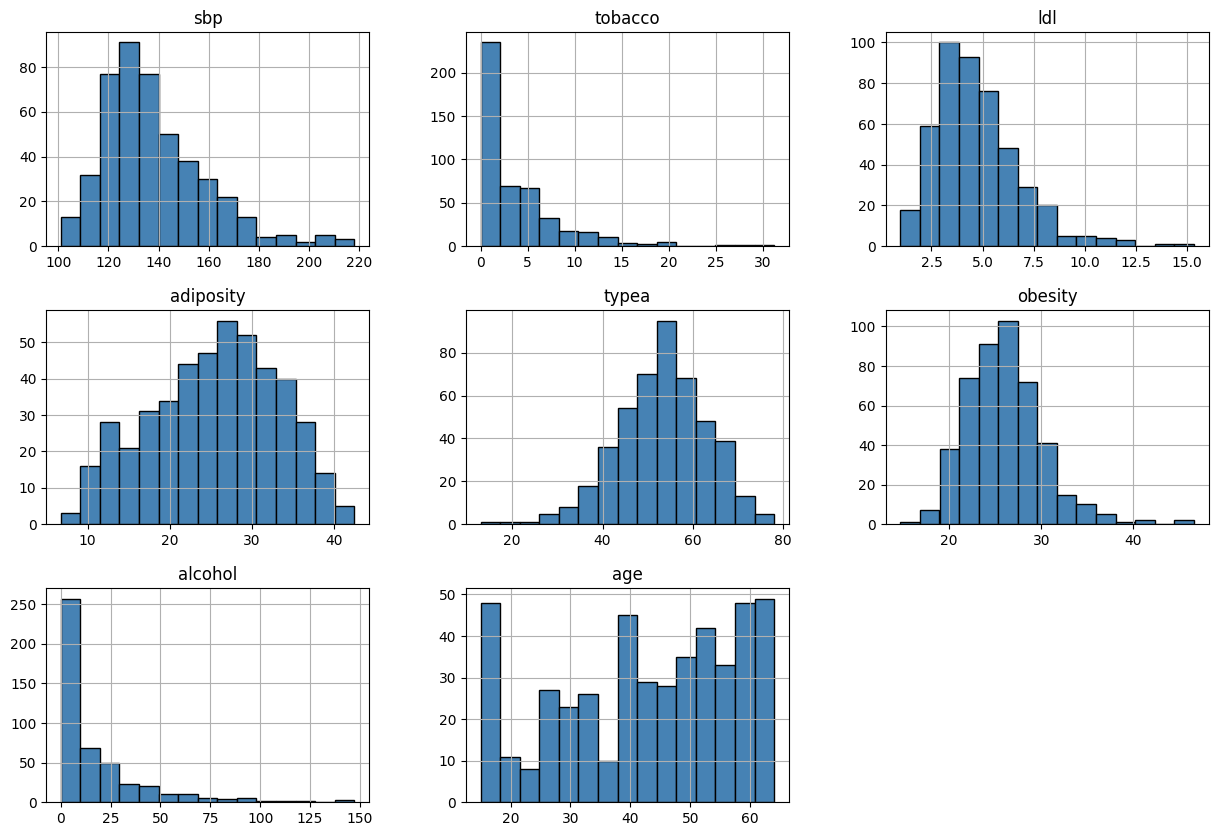

In [134]:
# Do the attributes appear to be normally distributed?

data[numeric_columns].hist(bins=15, figsize=(15, 10), color='steelblue', edgecolor='black')
plt.show()

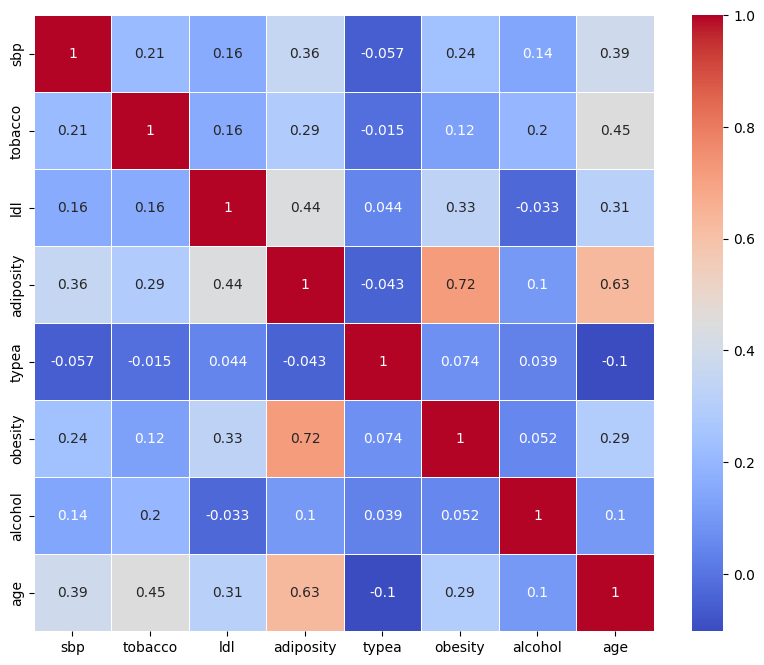

In [135]:
# Are variables correlated?

plt.figure(figsize=(10, 8))
correlation_matrix = data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

Does the primary machine learning modeling aim appear to be feasible based on your visualizations?

- The primary machine learning modeling aim was a classification task

### PCA

In [136]:
# One column in the dataframe that is not a numeric value
data['famhist'] = data['famhist'].map({'Present': 1, 'Absent': 0})

In [137]:
# Splitting the variables and target data
X = np.asarray(data.iloc[:, :-1].values)
y = np.asarray(data['chd'].values) 

# Some basic variables following the class exercises
N = len(y) #samples
M = X.shape[1] #features
C = len(np.unique(y))  #unique classes

In [138]:
# Centering the data for PCA
Y = X - np.ones((N, 1)) * X.mean(axis=0) #subtracts mean value from data

In [139]:
# Computing singular value decomposition (SVD) of y 
U, S, Vh = svd(Y, full_matrices=False)

# Computing the amount of variance explained by the principal components
rho = (S * S) / (S * S).sum()

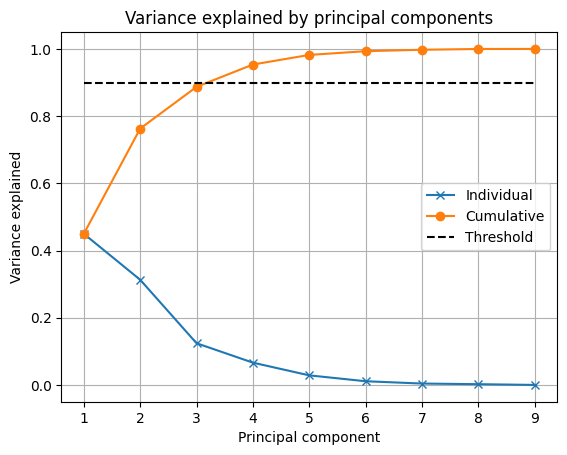

In [140]:
# Following class exercises week 3, we can use this plot to see how many principal components explain which amount of variance
threshold = 0.9
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()

In [141]:
# Vh is the Hermitian (transpose)of the vector V - so we transpose to get V:
V = Vh.T

# Projecting the centered data onto principal component space
Z = Y @ V

# We want to use 4 principal components to explain 90% variance
Z_4 = Z[:, :4]

# Storing the new dataframe
pca_df = pd.DataFrame(Z_4, columns=['PC1', 'PC2', 'PC3', 'PC4'])
pca_df['Class'] = y

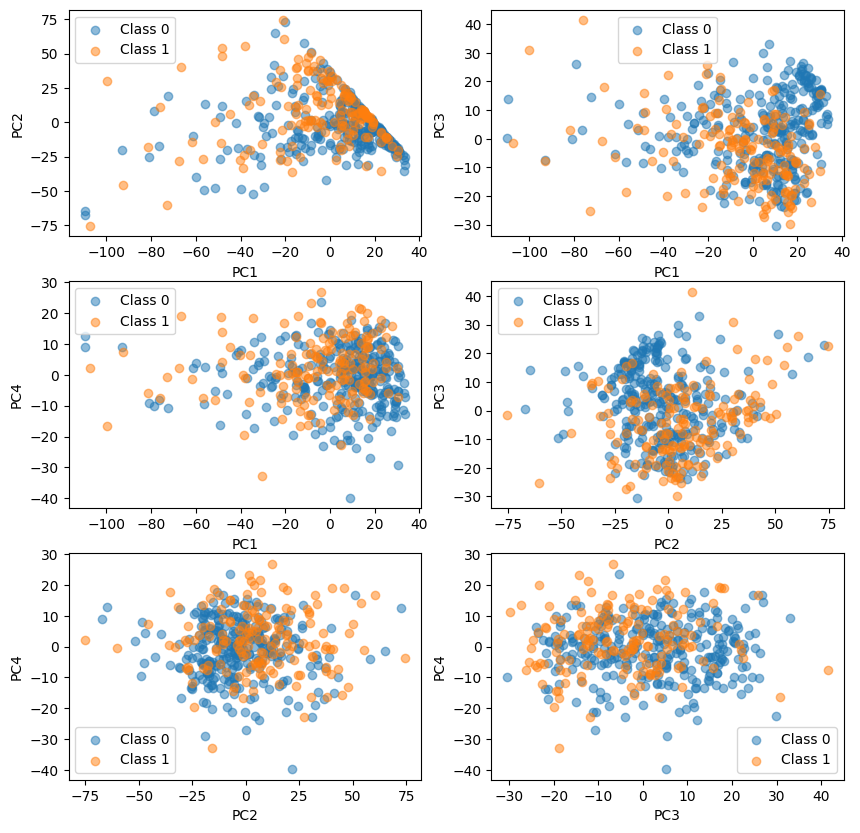

In [145]:
i = 0
j = 1
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
pairs = [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]
for index, (i, j) in enumerate(pairs):
    ax = axs[index // 2, index % 2]
    for c in np.unique(pca_df['Class']):
        class_mask = (pca_df['Class'] == c)
        ax.scatter(pca_df[class_mask]['PC' + str(i + 1)], pca_df[class_mask]['PC' + str(j + 1)],
                   label=f'Class {c}', alpha=0.5)
    
    ax.set_xlabel(f"PC{i + 1}")
    ax.set_ylabel(f"PC{j + 1}")
    ax.legend()
plt.show()
